In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 선형모델들중 선형회귀모델을 불러오기
from sklearn.metrics import mean_absolute_error

In [43]:
df = pd.read_csv("./data/Fish.csv")

In [44]:
df = df.loc[df["Species"] == "Perch", ["Species","Length2","Weight"]]

In [45]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


In [46]:
x_train, x_test, y_train, y_test = train_test_split(
    df["Length2"], 
    df["Weight"],
    test_size = 0.25,
    random_state = 31
)
# stragify : 딱히 구분지어줄 범주형 데이터가 없어서 안씀!


x_train = np.reshape(x_train.values, (-1,1))
x_test = np.reshape(x_test.values, (-1,1))

# 선형 회귀(linear regression)

- 피쳐를 가장 잘 표현하는 하나의 직선을 학습하는 알고리즘

- 장점

    - 계수들에 대한 해석이 간단
    - 학습과 예측 속도가 빠름
    - 회귀식이 만들어져서 예측이 어떻게 됐는지 쉽게 이해
- 단점
    - 데이터가 선형적이지 않을경우 모델이 데이터에 적합하지 않음
    - 이상치에 민감
    - 데이터는 환상의 포켓몬이다

In [47]:
lr = LinearRegression()

In [48]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [49]:
# 50cm 농어 예측
lr.predict([[50]])

array([1224.10347002])

- 선형회귀 모델이 찾은 가장 적합한 직선은 lr 객체에 저장되어 있음

In [50]:
# 계수(coefficient) = 기울기, y절편
print(lr.coef_, lr.intercept_)

[39.20851865] -736.3224622452472


- 회귀식 : Length2 * 39.20851865 + (-736.3224622452472)

- coef_ 와 intercept_ 처럼 머신러닝이 찾은 값을 모델 파라미터 라고 부름

- 즉, 머신러닝 알고리즘의 훈련 과정은 최적의 파라미터를 찾는 것

- 선형 회귀와 같이 모델 파라미터를 훈련하는 것을 **모델 기반 학습** 이라고 하고 KNN 과 같이 모델 파라미터가 없이 훈련데이터를 저장하는 방법을 **사례 기반 학습** 이라캄

In [51]:
lr.intercept_, 50 * lr.coef_[0] + lr.intercept_

(np.float64(-736.3224622452472), np.float64(1224.103470016128))

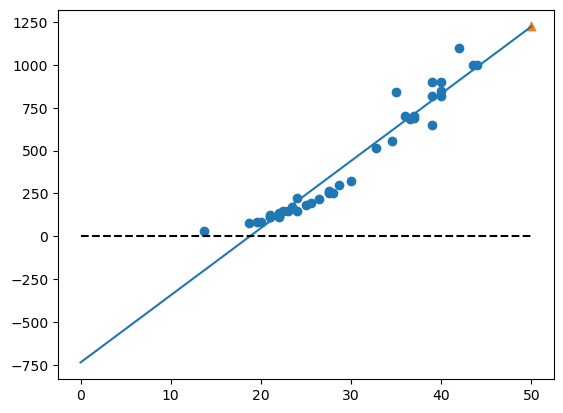

In [62]:
# 훈련 데이터와 회귀선 시각화

plt.figure()

plt.scatter(x_train, y_train)



plt.plot([0,50], [lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])
plt.plot([0,50], [0,0], "k--")



plt.scatter(50, 1224, marker = "^")

plt.show()

# 모델평가

In [18]:
lr.score(x_test,y_test)

0.8424582477598213

In [19]:
pred = lr.predict(x_test)

In [20]:
mae = mean_absolute_error(y_test, pred)

In [21]:
mae

113.81902748783402

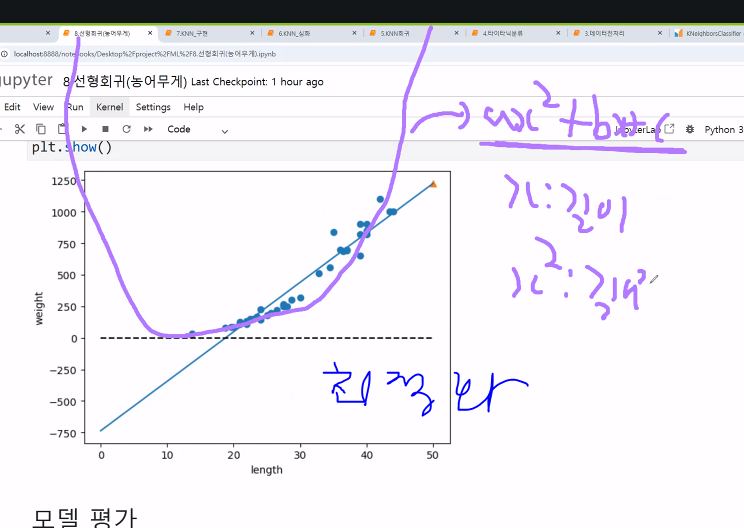

# 다항회귀

- 실제 농어의 무게는 일직선이라기 보다는 왼쪽 위로 구부러진 곡선에 가깝기 때문에 직선보다는 곡선으로 예측한느 것이 더 적합
- 길이를 제곱한 항을 추가하여 2차 방정식의 그래프를 학습

In [22]:
df["squared"] = df["Length2"] ** 2

In [23]:
df.head()

,Species,Length2,Weight,squared
72,Perch,8.4,5.9,70.56
73,Perch,13.7,32.0,187.69
74,Perch,15.0,40.0,225.00
75,Perch,16.2,51.5,262.44
76,Perch,17.4,70.0,302.76


In [24]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["Length2","squared"]],
    df["Weight"],
    test_size = 0.25,
    random_state = 31
)

In [25]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9827733109298226

In [26]:
pred = lr.predict(x_test)

mae = mean_absolute_error(y_test, pred)

In [27]:
mae

34.494591548386374

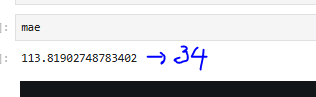

In [28]:
# 50cm 농어에 대한 예측
#  df[["Length2","squared"]],
lr.predict([[50, 2500]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1531.22419125])

In [29]:
print(
    lr.coef_, lr.intercept_
)

[-18.39432189   0.95133729] 72.59707200553726


- 회귀식 : -18.39 * Length2 + 0.95 * squared + 72.59

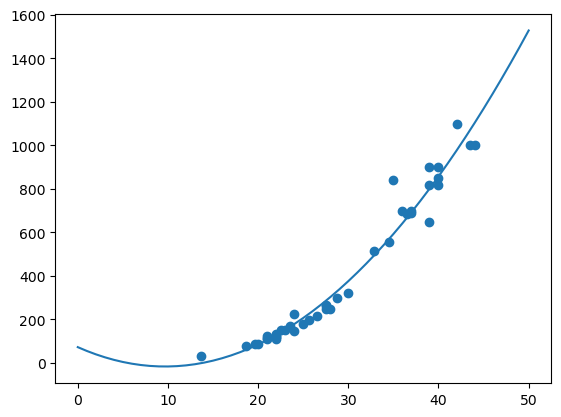

In [30]:
# 시각화

points = np.arange(51)

plt.scatter(x_train["Length2"], y_train)
plt.plot(points, -18.39 * points + 0.95 * (points ** 2) + 72.59 )

plt.show()

In [32]:
lr.predict([[10,100]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-16.21241834])